In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

In [134]:
df.head(5)

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [135]:
df.shape

(395547, 8)

1. 카테고리별 청원 수
2. (청원끝난날짜 - 청원시작날짜)의 분포
    - 각 날짜별 votes 수의 분포 ex.15일만에 끝난 청원들의 votes수의 분포
3. 시간이 지남에 따른 청원수의 추이 (start를 기준으로 산정)
    - 시간이 지남에 따라 각 카테고리 별 청원수의 추이
4. 답변을 들은 청원의 수와 분포 그리고 카테고리
5. 카테고리별 평균 votes수

# 1. 카테고리별 청원 수

In [137]:
df_category=pd.DataFrame(df['category'].value_counts()).reset_index()
df_category.columns = ['category', 'counts']
df_category

,category,counts
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993
3,안전/환경,30638
4,교통/건축/국토,28184
5,외교/통일/국방,26626
6,육아/교육,25537
7,보건복지,24848
8,일자리,23225
9,행정,20268


Text(0.5, 1.0, '카테고리별 청원수')

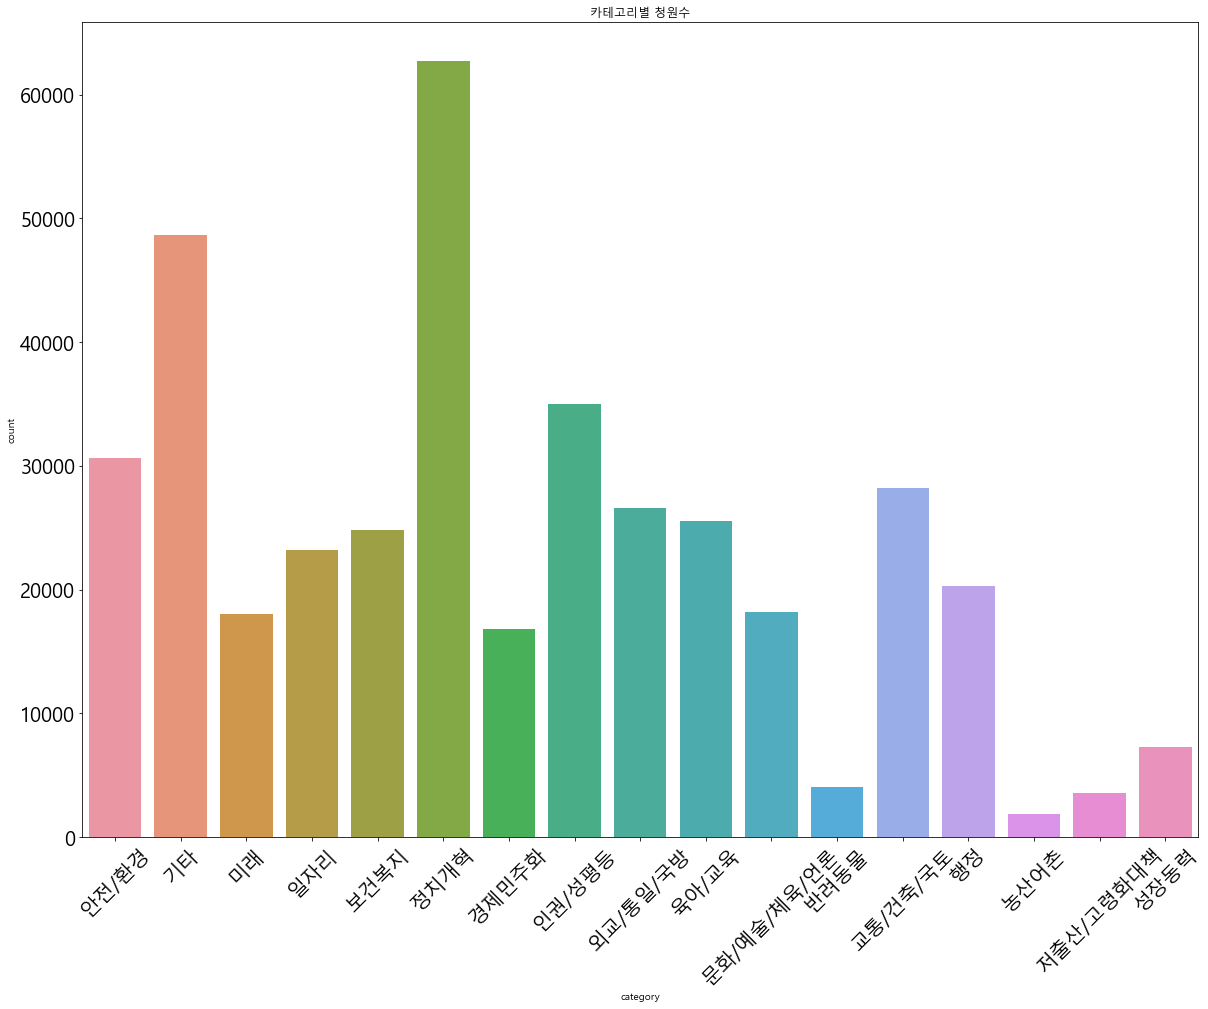

In [138]:
ax = plt.figure(figsize = (20, 15))
ax = plt.xticks(rotation=45, fontsize=20)
ax = plt.yticks(fontsize=20)
ax = sns.countplot('category',data=df)
ax.set_title("카테고리별 청원수")


In [139]:
df.votes.sort_values(ascending=False)

313314    1192049
208597     714875
10894      615354
118970     614127
183791     419006
           ...   
287433          0
55805           0
55804           0
210338          0
197773          0
Name: votes, Length: 395547, dtype: int64

# 2. 청원에 소요된 시간(청원끝난날짜 - 청원시작날짜)의 분포
    - 각 날짜별 votes 수의 분포 ex.7일만에 끝난 청원들의 votes수의 분포

In [175]:
df['days']=df['end']-df['start']
df['days']=df['days'].dt.days.astype('int16')
df['days']

0         90
1         90
2         15
3          7
4         15
          ..
395542    30
395543    30
395544    30
395545    30
395546    30
Name: days, Length: 395547, dtype: int16

In [170]:
df_days=pd.DataFrame(df['days'].value_counts()).reset_index()
df_days.columns = ['days', 'counts']
df_days['days']=df_days['days'].dt.days.astype('int16')
df_days

,days,counts
0,30,384347
1,90,6754
2,7,2436
3,15,1204
4,60,806


In [171]:
str(df_days['days'])

'0    30\n1    90\n2     7\n3    15\n4    60\nName: days, dtype: int16'

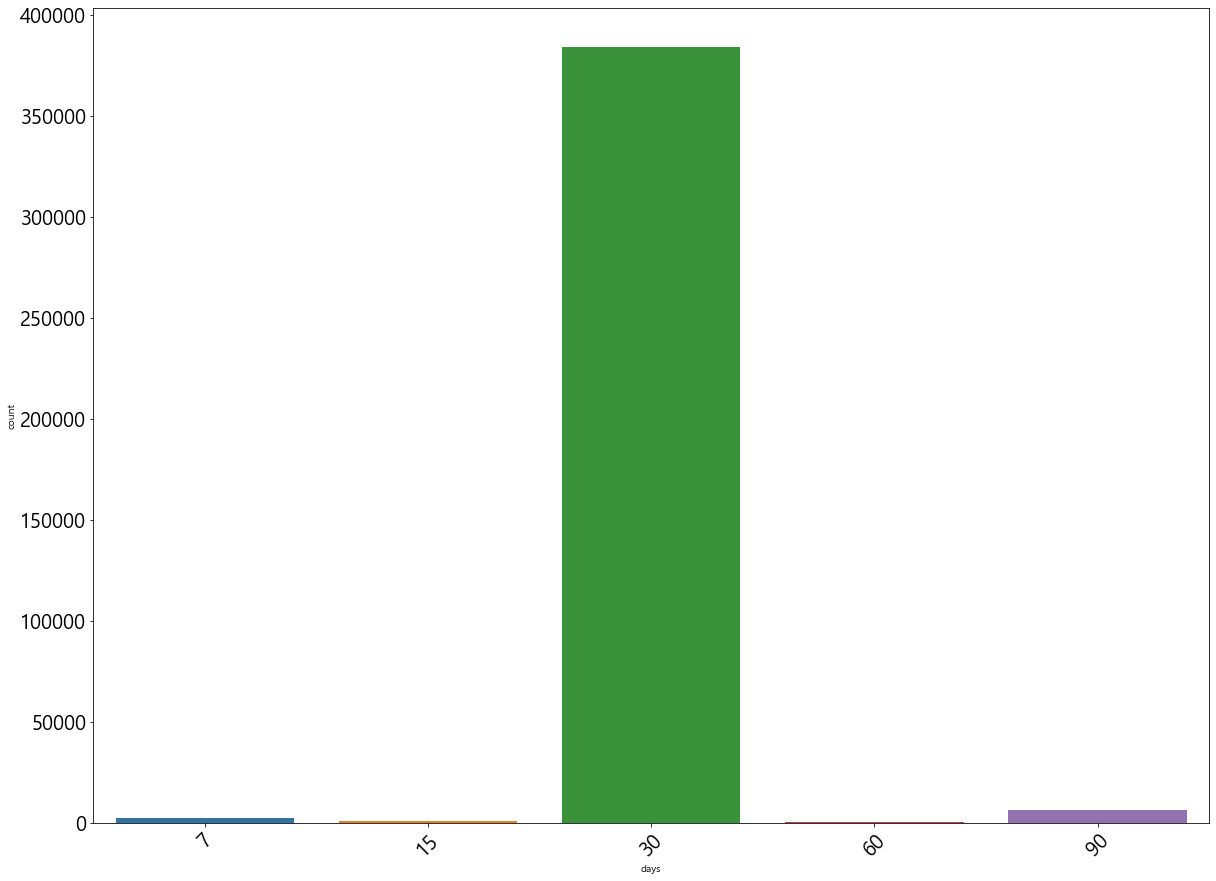

In [176]:
ax = plt.figure(figsize = (20, 15))
ax = plt.xticks(rotation=45, fontsize=20)
ax = plt.yticks(fontsize=20)
ax = sns.countplot('days',data=df)

국민청원은 기본적으로 30일 동안 청원을 할 수 있는데 7일, 15일로 일찍 마감된 청원들도 있고, 이유는 알 수 없으나 60일, 90일이 걸린 청원도 있다.

(0.0, 100.0)

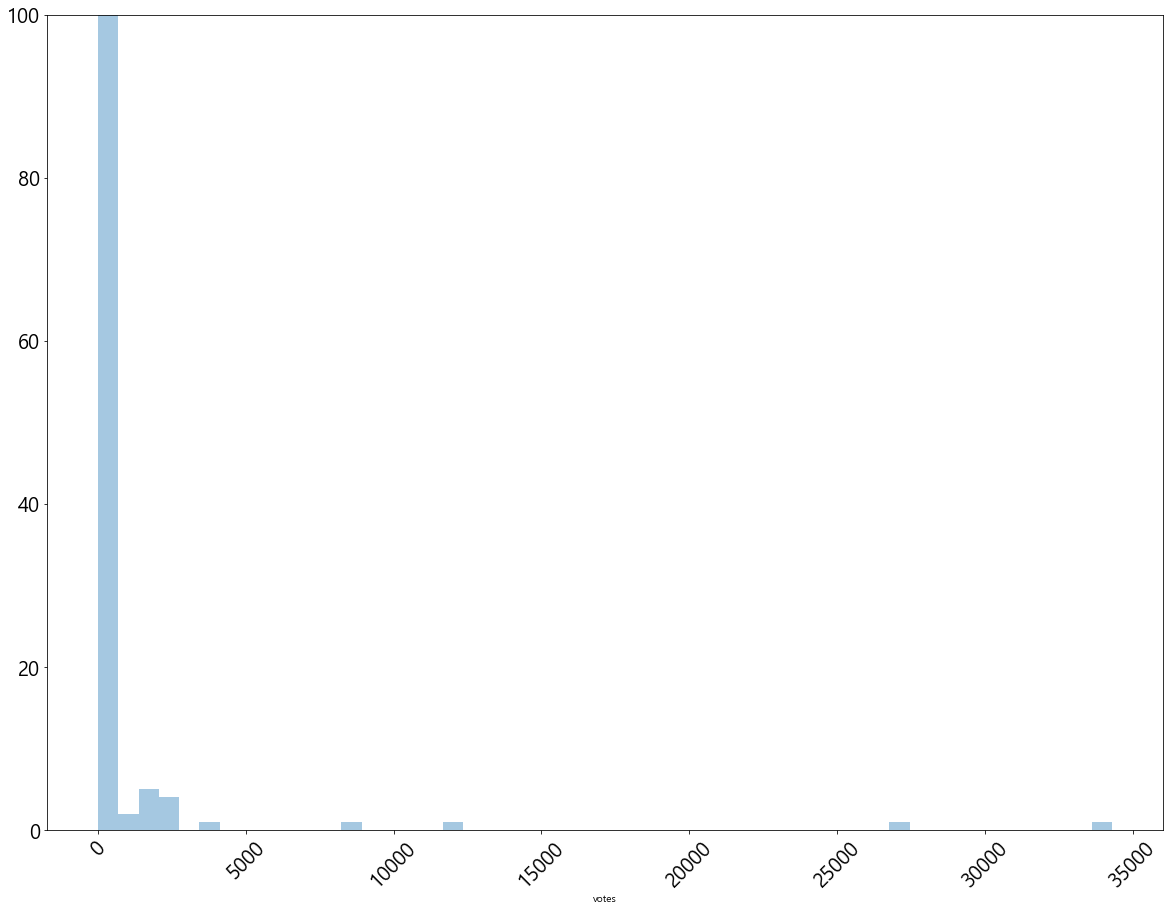

In [191]:
df_7=df[df['days'] == 7]
ax = plt.figure(figsize = (20, 15))
ax = plt.xticks(rotation=45, fontsize=20)
ax = plt.yticks(fontsize=20)
ax = sns.distplot(df_7['votes'],kde=False)
ax.set_ylim(0,100)

7일만에 끝난 청원은 대부분 투표를 많이 받지 못해 일찍 끝난 것으로 보인다.

# 3. 시간이 지남에 따른 청원수의 추이 (start를 기준으로 산정)
    - 시간이 지남에 따라 각 카테고리 별 청원수의 추이

In [206]:
df_start=pd.DataFrame(df['start'].value_counts()).reset_index()
df_start.columns = ['start', 'counts']
df_start

,start,counts
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368
3,2018-02-06,2631
4,2017-11-09,2487
...,...,...
530,2017-09-15,74
531,2017-08-22,69
532,2017-08-27,49
533,2017-08-19,39


In [208]:
df_start.index= df_start['start']

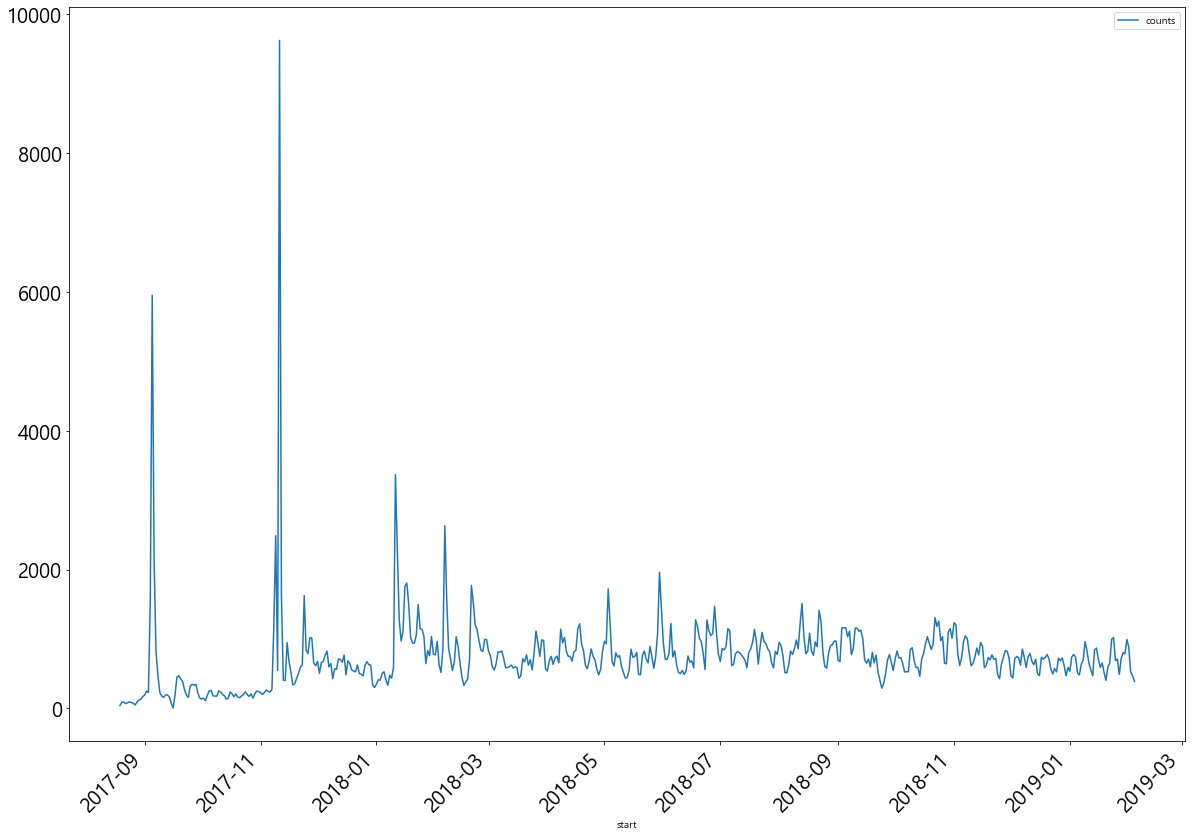

In [213]:
fig, ax = plt.subplots(figsize=(20,15))
ax = df_start.iloc[0:,1:].plot(ax=ax)
ax = plt.xticks(rotation=45, fontsize=20)
ax = plt.yticks(fontsize=20)

## 2017년에는 청원이 굉장이 많이 나온 피크를 보이는 시기가 2곳 있지만 점차 피크가 사라지는 경향을 보인다.

# 4. 답변을 들은 청원의 수와  카테고리 별 수

In [214]:
df[df['votes']>=200000]

,article_id,start,end,answered,votes,category,title,content,days
1752,1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,60
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,90
18111,18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,30
25032,26024,2017-11-04,2017-12-04,1,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",30
43992,45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",30
...,...,...,...,...,...,...,...,...,...
363005,472309,2018-12-18,2019-01-17,0,269110,인권/성평등,조재범 코치를 강력처벌해주세요,그는 국가대표 심석희 외 다수의 여자선수들을 지속적으로 적어도 14년간 폭행해온 쓰...,30
375654,489302,2019-01-07,2019-02-06,0,302856,정치개혁,여.야는 속히 공수처 신설하라 !!!,지금 대한 민국은 나라를 바로 잡기 위해 반드시 이번 정부내에 검찰과 법원의 확실한...,30
390787,510422,2019-01-29,2019-02-28,0,312197,기타,"경사 ***, 경장 *** 외 ***에서 뇌물받는지 조사부탁드립니다.","경사 ***, 경장 *** 등등 ***에서 뇌물받는지 조사부탁드립니다.\nㅡㅡㅡㅡㅡ...",30
391208,511075,2019-01-29,2019-02-28,0,207784,인권/성평등,"공공연한 여성 대상 약물 범죄 처벌과 ***을 비롯한 클럽, 유흥업소와 경찰 간의 ...",*** 사태의 핵심은 클럽&유흥업소 운영 관리인들의 의도적 약물 사용이 의심되는 납...,30


In [218]:
df[df['votes']>=200000].count() # 답변받은 청원 80개

article_id    80
start         80
end           80
answered      80
votes         80
category      80
title         80
content       80
days          80
dtype: int64

In [225]:
df_answer=pd.DataFrame(df[df['votes']>=200000].groupby('category').size())
df_answer

,0
category,
경제민주화,2
교통/건축/국토,3
기타,8
문화/예술/체육/언론,7
미래,1
반려동물,4
보건복지,3
성장동력,2
안전/환경,10


Text(0.5, 1.0, '카테고리별 답변 받은 청원수')

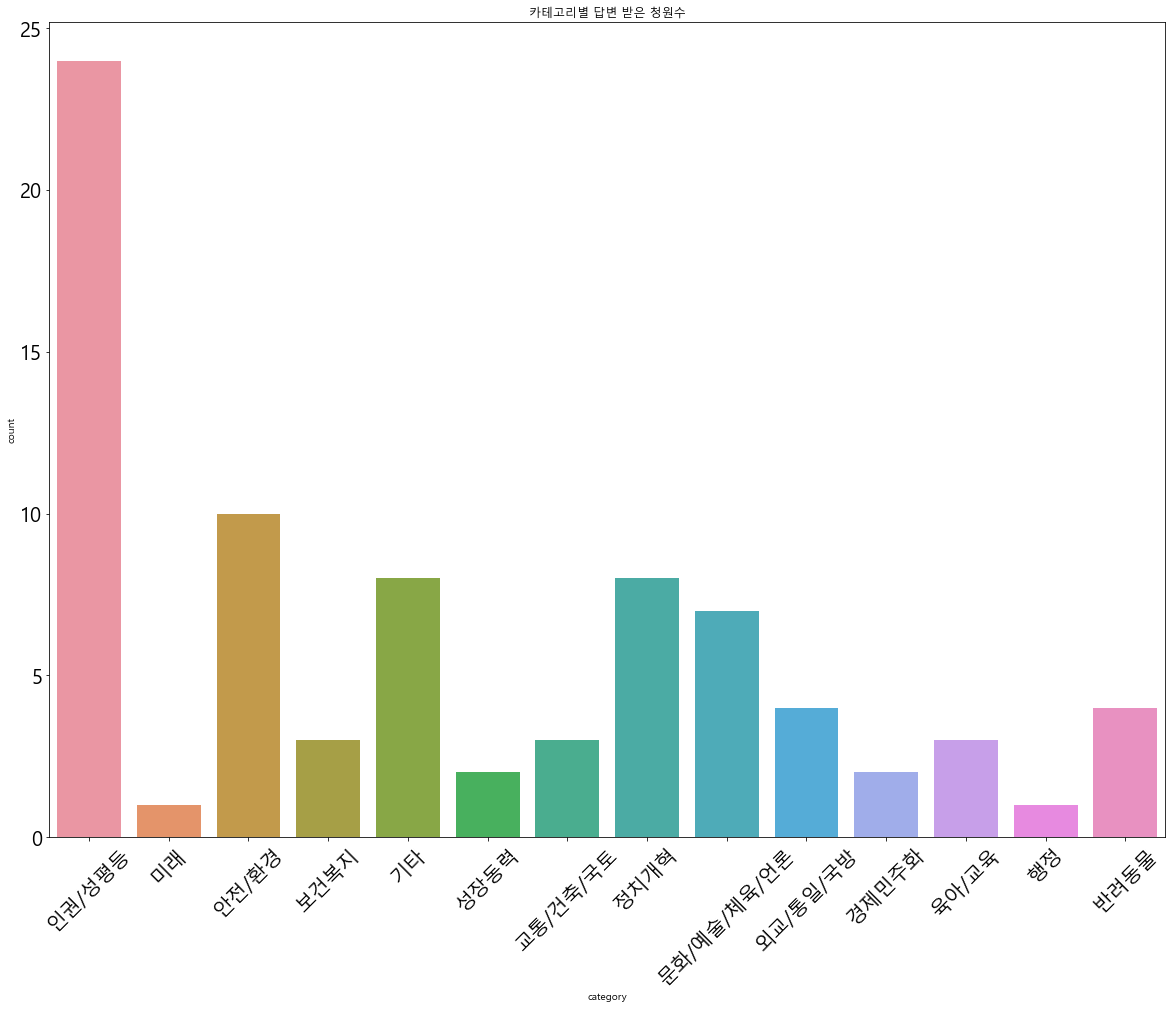

In [227]:
df_answer_1 = df[df['votes']>=200000]
ax = plt.figure(figsize = (20, 15))
ax = plt.xticks(rotation=45, fontsize=20)
ax = plt.yticks(fontsize=20)
ax = sns.countplot('category',data=df_answer_1)
ax.set_title("카테고리별 답변 받은 청원수")

## 답변받은 청원의 수가 가장 많은 카테고리는 인권/ 성평등 카테고리 였다.

# 5. 카테고리별 평균 votes수

In [228]:
df_category=pd.DataFrame(df['category'].value_counts()).reset_index()
df_category.columns = ['category', 'counts']
df_category

,category,counts
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993
3,안전/환경,30638
4,교통/건축/국토,28184
5,외교/통일/국방,26626
6,육아/교육,25537
7,보건복지,24848
8,일자리,23225
9,행정,20268


In [236]:
df_mean = df.groupby('category').mean()
df_mean

,article_id,answered,votes,days
category,,,,
경제민주화,269704.471863,0.000060,103.589591,30.046091
교통/건축/국토,303410.125000,0.000071,102.977931,30.160659
기타,251122.465305,0.000021,106.619859,30.703792
농산어촌,272864.345952,0.000000,62.497897,30.128286
문화/예술/체육/언론,243175.457022,0.000220,227.923106,30.237491
미래,247189.842056,0.000056,63.371833,31.422556
반려동물,254825.338427,0.000000,509.397091,30.378851
보건복지,265197.917458,0.000080,174.710681,30.272497
성장동력,247502.074590,0.000276,120.203640,30.077623


In [245]:
df_arr = np.arange(len(df_category['category']))
df_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [248]:
x_label=df_mean.index
x_label

Index(['경제민주화', '교통/건축/국토', '기타', '농산어촌', '문화/예술/체육/언론', '미래', '반려동물', '보건복지',
       '성장동력', '안전/환경', '외교/통일/국방', '육아/교육', '인권/성평등', '일자리', '저출산/고령화대책',
       '정치개혁', '행정'],
      dtype='object', name='category')

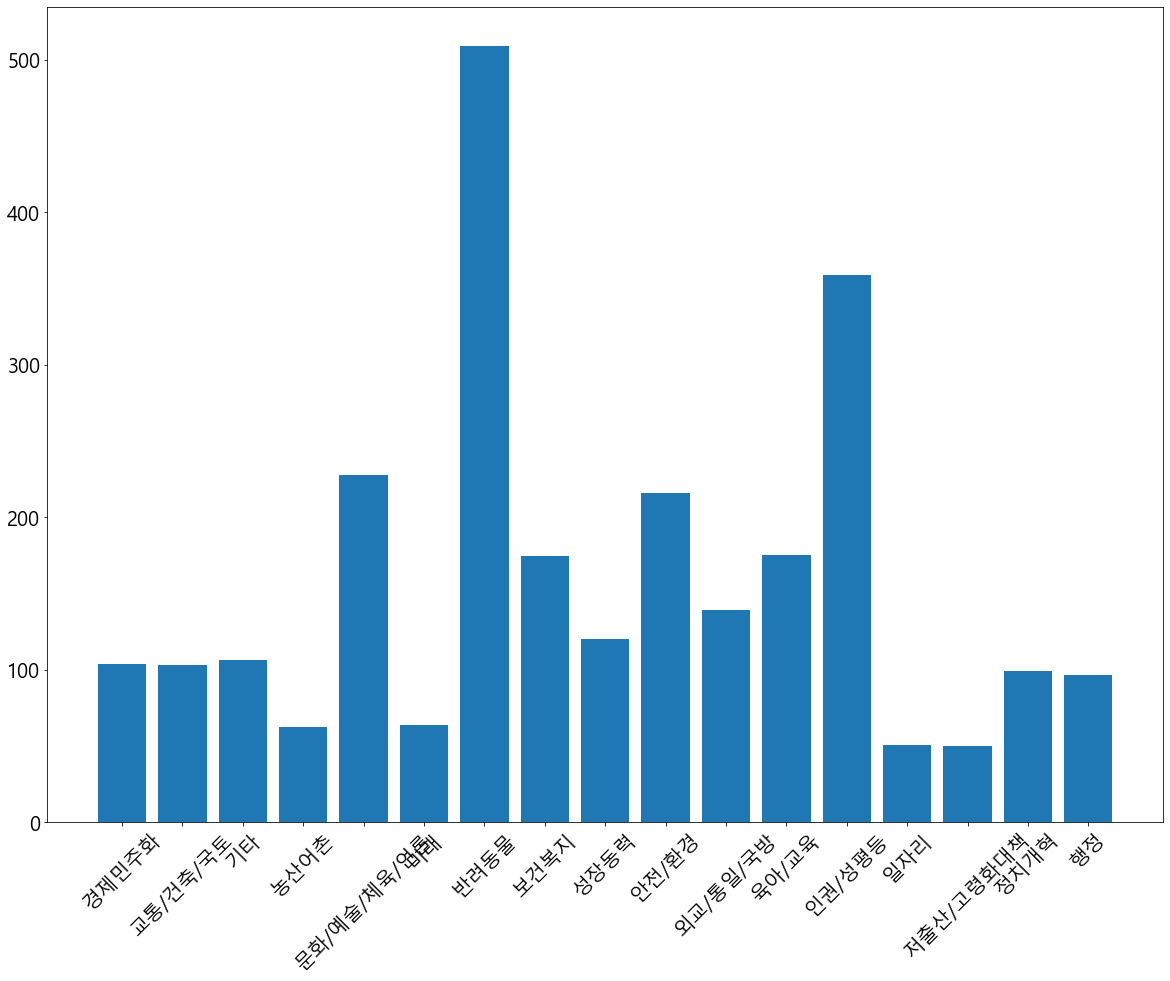

In [259]:
df_arr = np.arange(len(df_category['category']))
ax = plt.figure(figsize = (20, 15))
ax = plt.bar(df_arr,df_mean['votes'])
ax =plt.xticks(df_arr,x_label)
ax =plt.xticks(rotation=45, fontsize=20)
ax = plt.yticks(fontsize=20)

### 반려동물 카테고리의 votes수의 평균이 가장 높다는 것을 알 수 있다.